# Notebook just make to check if the RECO looks the same between R15107 rebinned and not rebinned w/ rebin=4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

from typing          import Optional
from typing          import Union
from typing          import Callable

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'


from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.evm.event_model                          import HitCollection

from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType

from IC.invisible_cities.reco import hits_functions as hif

from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio

from IC.invisible_cities.cities.components import track_blob_info_creator_extractor
from IC.invisible_cities.io.hits_io        import load_hits
from IC.invisible_cities.io.hits_io        import hits_from_df
from IC.invisible_cities.core              import system_of_units as units
from IC.invisible_cities.types.symbols     import HitEnergy
from IC.invisible_cities.evm.event_model   import HitCollection
from IC.invisible_cities.evm.event_model   import Cluster
from IC.invisible_cities.evm.event_model   import Hit
from IC.invisible_cities.types.ic_types    import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from collections import defaultdict

import matplotlib.cm as cm
from matplotlib.colors import Normalize

pd.set_option('display.max_rows', 200)

#import imageio

#import functions as func


In [2]:
soph_folder = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/sophronia_rebin/trigger_2/ldc1/'
soph_file = 'run_15107_0966_ldc1_trg2.v2.3.1.20250328.HEDesmanTest.sophronia.h5'
soph_hdst = dstio.load_dst(soph_folder + soph_file, 'RECO', 'Events')

soph_folder_r = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/sophronia/trigger2/ldc1/'
soph_file_r = 'run_15107_0966_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5'
soph_hdst_r = dstio.load_dst(soph_folder_r + soph_file_r, 'RECO', 'Events')

print(f'Event range: {soph_hdst.event.unique()}')

Event range: [664239 664246 664302 664393 664526 664533 664540 664547 664561 664582
 664778 664855]


In [3]:
display(soph_hdst_r)
display(soph_hdst)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,664239,1.742944e+09,6,-10.382433,125.326997,1,288.875,-1.375,0.0,0.0,-894.110312,5.366340,44.617103,-1.0,0.000105,-1,-1.0
1,664239,1.742944e+09,6,-10.382433,125.326997,1,-359.225,-16.925,0.0,0.0,-890.650656,5.717019,115.438811,-1.0,0.000284,-1,-1.0
2,664239,1.742944e+09,6,-10.382433,125.326997,1,-312.575,137.575,0.0,0.0,-890.650656,6.232642,125.850332,-1.0,0.000301,-1,-1.0
3,664239,1.742944e+09,6,-10.382433,125.326997,1,88.725,-417.725,0.0,0.0,-890.650656,6.200433,125.199975,-1.0,0.000323,-1,-1.0
4,664239,1.742944e+09,6,-10.382433,125.326997,1,-50.225,307.125,0.0,0.0,-884.739781,5.321256,213.313864,-1.0,0.000505,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25018,664855,1.742944e+09,2,-193.719737,191.350306,1,-281.475,292.075,0.0,0.0,541.769375,6.028067,33.204468,-1.0,0.000099,-1,-1.0
25019,664855,1.742944e+09,2,-193.719737,191.350306,1,-281.475,307.625,0.0,0.0,541.769375,6.630632,36.523585,-1.0,0.000111,-1,-1.0
25020,664855,1.742944e+09,2,-193.719737,191.350306,1,-297.025,292.075,0.0,0.0,543.787250,8.183501,116.250029,-1.0,0.000350,-1,-1.0
25021,664855,1.742944e+09,2,-193.719737,191.350306,1,227.675,-433.275,0.0,0.0,543.787250,5.494923,78.057661,-1.0,NaN,-1,-1.0


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,664239,1.742944e+09,0,-4.548978,11.100056,1,-173.625,-217.575,0.0,0.0,-1230.250211,5.490024,-0.733028,-1.0,-0.000002,-1,-1.0
1,664239,1.742944e+09,0,-4.548978,11.100056,1,-50.225,477.175,0.0,0.0,-1230.250211,7.125721,-0.951427,-1.0,NaN,-1,-1.0
2,664239,1.742944e+09,0,-4.548978,11.100056,1,366.625,-279.275,0.0,0.0,-1230.250211,6.667996,-0.890311,-1.0,-0.000002,-1,-1.0
3,664239,1.742944e+09,0,-4.548978,11.100056,1,-81.325,-294.325,0.0,0.0,-1227.768775,5.046278,-1.203545,-1.0,-0.000003,-1,-1.0
4,664239,1.742944e+09,0,-4.548978,11.100056,1,181.025,-202.025,0.0,0.0,-1227.768775,5.355896,-1.277389,-1.0,-0.000003,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,664855,1.742944e+09,3,-127.496197,160.197782,1,-297.025,260.975,0.0,0.0,598.252375,6.218834,18.957977,-1.0,0.000056,-1,-1.0
29429,664855,1.742944e+09,3,-127.496197,160.197782,1,-281.475,307.625,0.0,0.0,598.252375,6.749036,20.574285,-1.0,0.000063,-1,-1.0
29430,664855,1.742944e+09,3,-127.496197,160.197782,1,10.975,276.025,0.0,0.0,598.252375,5.190789,15.824004,-1.0,0.000045,-1,-1.0
29431,664855,1.742944e+09,3,-127.496197,160.197782,1,73.175,369.325,0.0,0.0,598.252375,5.426896,16.543769,-1.0,0.000049,-1,-1.0


In [4]:
PSF_PATH = '/gluster/data/next/files/TOPOLOGY_John/N100_data/14914/prod_psf/eutropia/merged_psfs/final_psf.psf'
datatype = 'data'
detector_db = '/gluster/data/next/software/IC_311024/IC/invisible_cities/database/localdb.NEXT100DB.sqlite3'
run_number = 15107

deconv_params = dict(
  q_cut           = 10, #5 for 6mm  - 5 for 6mm
  drop_dist       = [16, 16],
  psf_fname       = PSF_PATH,     
  e_cut           = 0.3, #15 for 6mm  - 15 for 6mm
  n_iterations    = 30, #150 for 6mm  - 150 for 6mm
  iteration_tol   = 1e-9,
  sample_width    = [15.55, 15.55],
  bin_size        = [ 5,  5],
  diffusion       = (1., 0.2),
  n_dim           = 2,
  deconv_mode     = DeconvolutionMode.joint,
  satellite_params = dict(satellite_start_iter = 100,
                          satellite_max_size   = 25,
                          e_cut                = 0.9,
                          cut_type             = CutType.rel),
  energy_type     = HitEnergy.Ec,
  cut_type        = CutType.rel)
 # inter_method    = InterpolationMethod.cubic)
#satellite_params = dict(satellite_start_iter = 75,
#                        satellite_max_size   = 3,
#                        e_cut                = 0.2,
#                        cut_type             = CutType.rel)
                
deconv_params_   = {k : v for k, v in deconv_params.items() if k not in ['q_cut', 'drop_dist']}

# Couple of functions used in beersheba.

cut_sensors       = beerfun.cut_over_Q   (deconv_params['q_cut'    ], ['E', 'Ec'])
drop_sensors      = beerfun.drop_isolated(deconv_params['drop_dist'], ['E', 'Ec'])


## Select a single event from each

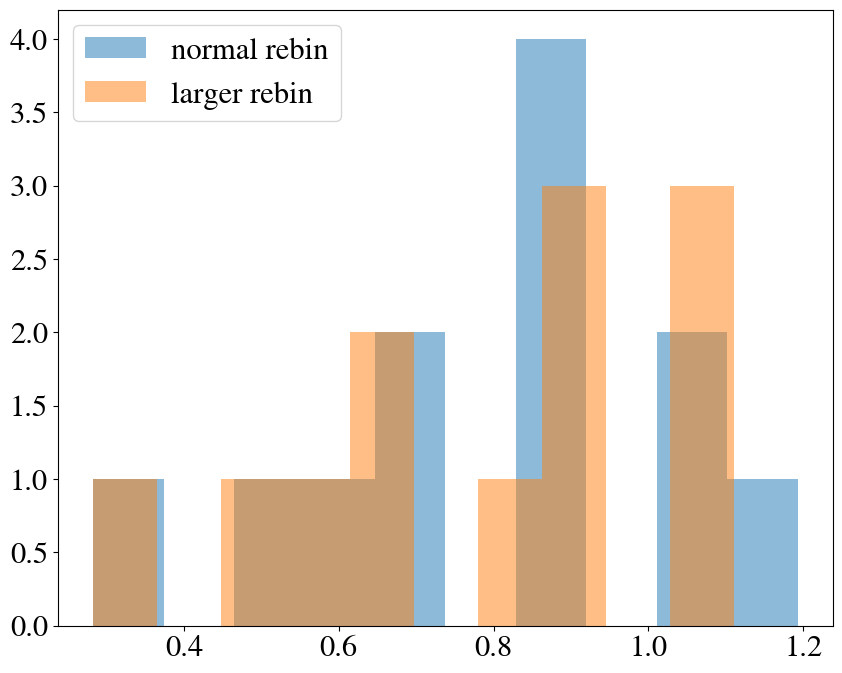

In [5]:
# first lets checkout the energy histo
plt.hist(soph_hdst.groupby('event').Ec.sum(), label = 'normal rebin', alpha = 0.5)
plt.hist(soph_hdst_r.groupby('event').Ec.sum(), label = 'larger rebin', alpha = 0.5)
plt.legend()
plt.show()
# didnt expect any different really...

In [6]:
evt = soph_hdst.event.unique()[7]

evt_interest = soph_hdst[soph_hdst.event == evt]
evt_interest_r = soph_hdst_r[soph_hdst_r.event == evt]

print(f'Event chosen: {evt}')

Event chosen: 664547


EVENT 664547
Total energy 0.89 MeV

Time spent in cut_over_Q: 0.02872943878173828 s
Time spent in drop_isolated: 0.054662227630615234 s


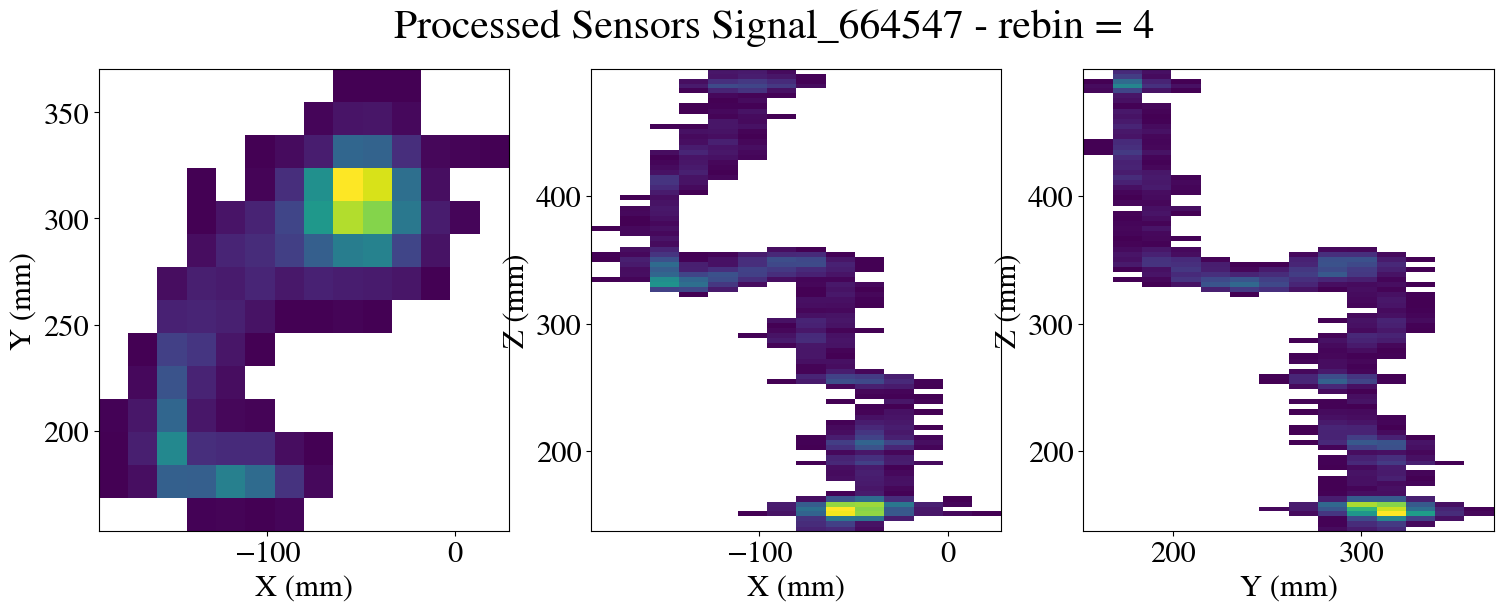

In [7]:
print('======================')
print(f'EVENT {evt}')
print(f'Total energy {evt_interest.Ec.sum():.2f} MeV')
print('======================\n')
hits_cut = coref.timefunc(cut_sensors)(evt_interest.copy())
hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())
pitch = 15.55
# then applying transformations to convert to 'SiPM outputs'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


xx = np.arange(hits_drop.X.min(), hits_drop.X.max() + pitch, pitch)
yy = np.arange(hits_drop.Y.min(), hits_drop.Y.max() + pitch, pitch)
zz = hits_cut.Z.unique()

axes[0].hist2d(hits_drop.X, hits_drop.Y, bins=[xx, yy], weights=hits_drop.Q, cmin=0.0001);
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(hits_drop.X, hits_drop.Z, bins=[xx, zz], weights=hits_drop.Q, cmin=0.0001);
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(hits_drop.Y, hits_drop.Z, bins=[yy, zz], weights=hits_drop.Q, cmin=0.0001);
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Processed Sensors Signal_' + str(evt) + ' - rebin = 4', fontsize=30)
#plt.savefig(f'plots/hits_{evt}.pdf')
plt.show(fig)


EVENT 664547
Total energy 0.89 MeV

Time spent in cut_over_Q: 0.020639896392822266 s
Time spent in drop_isolated: 0.03457784652709961 s


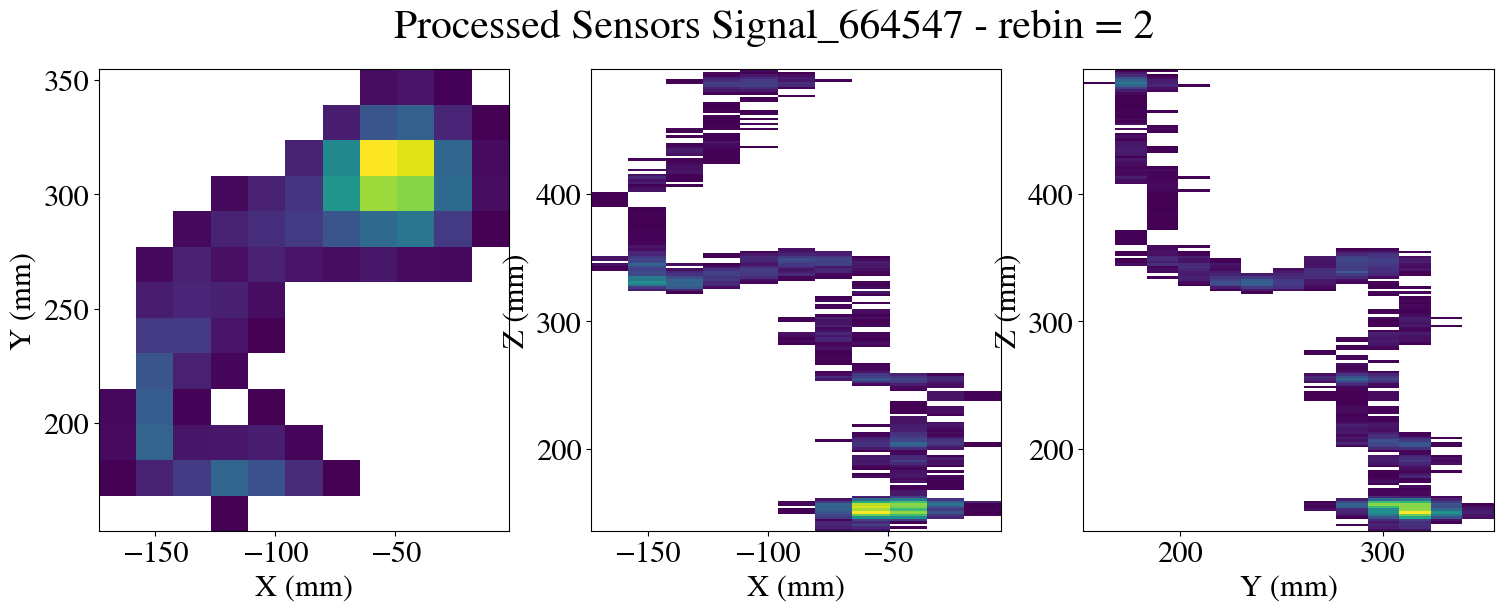

In [8]:
print('======================')
print(f'EVENT {evt}')
print(f'Total energy {evt_interest_r.Ec.sum():.2f} MeV')
print('======================\n')
hits_cut = coref.timefunc(cut_sensors)(evt_interest_r.copy())
hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())
pitch = 15.55
# then applying transformations to convert to 'SiPM outputs'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


xx = np.arange(hits_drop.X.min(), hits_drop.X.max() + pitch, pitch)
yy = np.arange(hits_drop.Y.min(), hits_drop.Y.max() + pitch, pitch)
zz = hits_cut.Z.unique()

axes[0].hist2d(hits_drop.X, hits_drop.Y, bins=[xx, yy], weights=hits_drop.Q, cmin=0.0001);
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(hits_drop.X, hits_drop.Z, bins=[xx, zz], weights=hits_drop.Q, cmin=0.0001);
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(hits_drop.Y, hits_drop.Z, bins=[yy, zz], weights=hits_drop.Q, cmin=0.0001);
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Processed Sensors Signal_' + str(evt) + ' - rebin = 2', fontsize=30)
#plt.savefig(f'plots/hits_{evt}.pdf')
plt.show(fig)

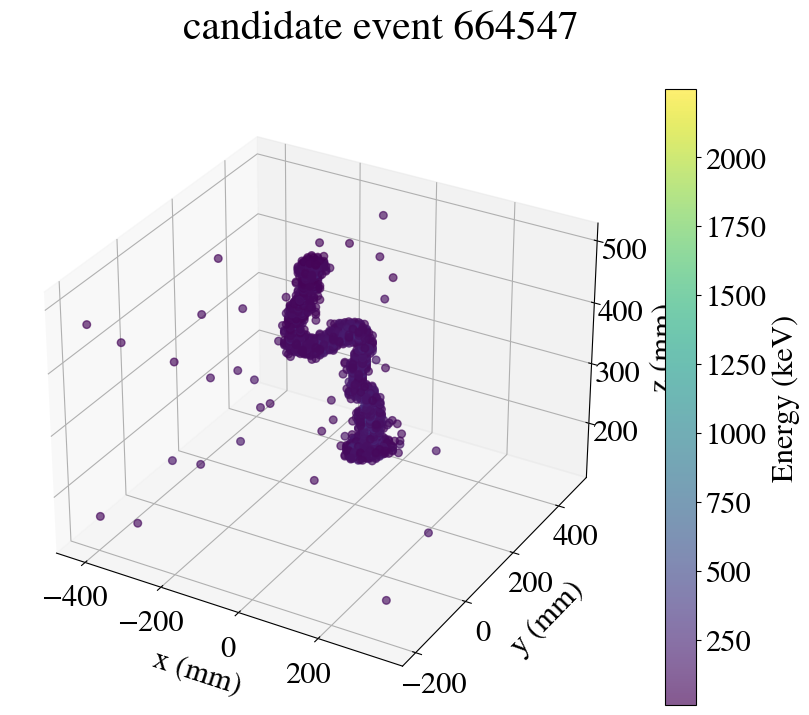

In [27]:
# plot

xt = hits_drop.X
yt = hits_drop.Y
zt = hits_drop.Z
et = hits_drop.E

fig = plt.figure()
#fig.suptitle('3D post deconvolution ' + str(evt), fontsize=30)
fig.suptitle(f'candidate event {evt}', fontsize=30)
ax = fig.add_subplot(111, projection='3d')



ets = et > 0 # eliminate small things for measurement

#p = ax.scatter(x[em], y[em], z[em], c=e[em], alpha=0.3, cmap='viridis')
#plt_sphere([(-track.blob2_x.values[0], -track.blob2_y.values[0], -track.blob2_z.values[0])], [blobR])
p = ax.scatter([xt[ets]], yt[ets], zt[ets], c=et[ets], alpha=0.65, cmap='viridis', s = 30)#, s = et[ets])
#q = ax.scatter(xt, yt, zt, alpha = 0.3, color = 'red')

# overlay the blobs and their radii

cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')


ax.set_xlabel('\nx (mm)')
ax.set_ylabel('\ny (mm)')
ax.set_zlabel('\nz (mm)')

#ax.set_xlim([-300, -100])
#ax.set_ylim([250, 450])
#ax.set_zlim([1600, 1800])
#ax.view_init(20, -150)

#plt.savefig(f'gif_making/deconv/angle_{i}.png')
#plt.savefig(f'plots/hits_3d_{evt}.pdf')
plt.show()

# differing q_cuts

we're gonna recreate an old plot of mine, with differing q_cuts over particular events

In [87]:
def plot_hits(hits_drop, evt, title = None):


    print('======================')
    print(f'EVENT {evt}')
    print(f'Total energy {hits_drop.Ec.sum():.2f} MeV')
    print('======================\n')


    pitch = 15.55 # hardcoded for n100
    # then applying transformations to convert to 'SiPM outputs'
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))


    xx = np.arange(hits_drop.X.min(), hits_drop.X.max() + pitch, pitch)
    yy = np.arange(hits_drop.Y.min(), hits_drop.Y.max() + pitch, pitch)
    zz = hits_cut.Z.unique()

    axes[0].hist2d(hits_drop.X, hits_drop.Y, bins=[xx, yy], weights=hits_drop.Q, cmin=0.0001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(hits_drop.X, hits_drop.Z, bins=[xx, zz], weights=hits_drop.Q, cmin=0.0001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(hits_drop.Y, hits_drop.Z, bins=[yy, zz], weights=hits_drop.Q, cmin=0.0001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');
    if title == None:
        fig.suptitle('Processed Sensors Signal_' + str(evt) + ' - rebin = 4', fontsize=30)
    else:
        fig.suptitle(title, fontsize=30)
    #plt.savefig(f'plots/hits_{evt}.pdf')
    plt.show(fig)

EVENT 664547
Total energy 0.89 MeV



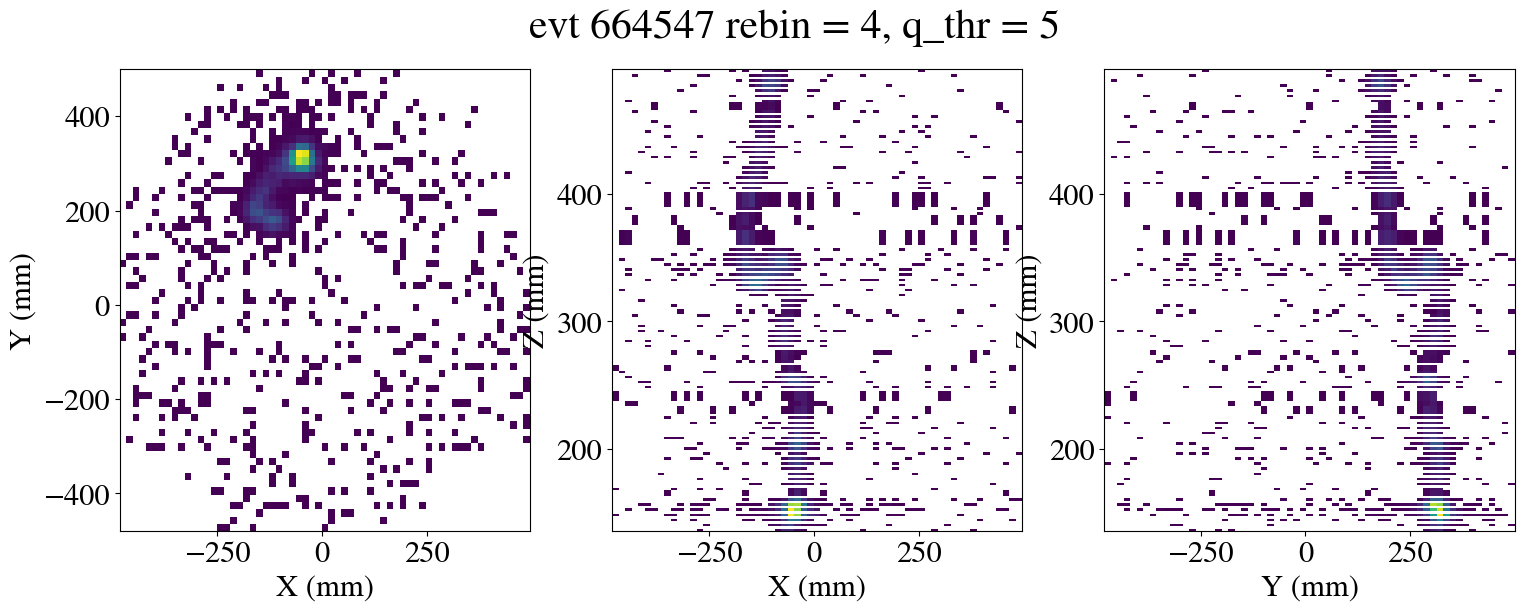

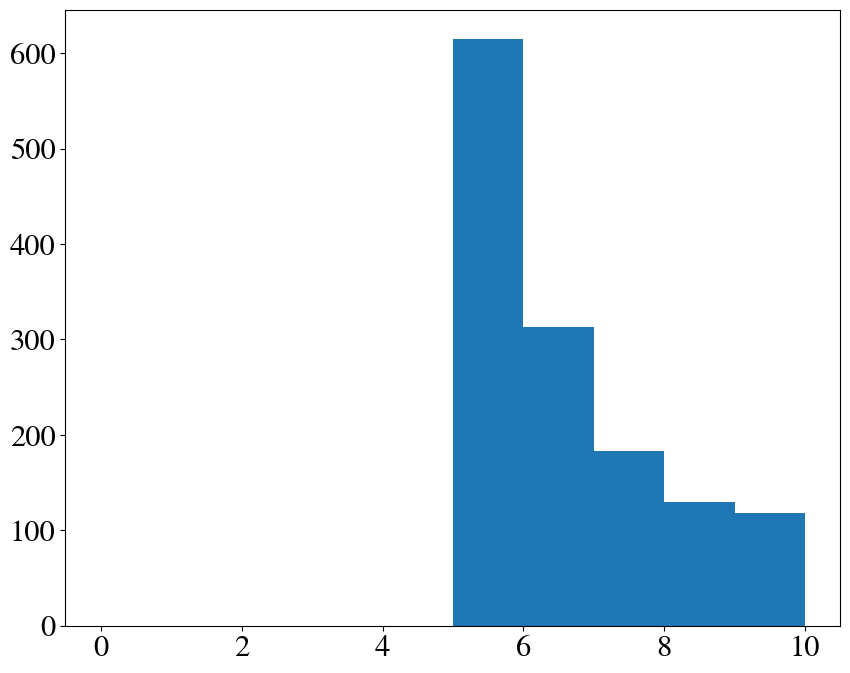

In [17]:
# lets load the bare event back in here
evt = soph_hdst.event.unique()[7]
evt_interest = soph_hdst[soph_hdst.event == evt]


print('======================')
print(f'EVENT {evt}')
print(f'Total energy {evt_interest.Ec.sum():.2f} MeV')
print('======================\n')
#hits_cut = coref.timefunc(cut_sensors)(evt_interest.copy())
#hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())
plot_hits(evt_interest, evt, title = f'evt {evt} rebin = 4, q_thr = 5')

# and whats the q_thr right now?
plt.hist(evt_interest.Q.values, range = [0, 10])
plt.show()

Time spent in cut_over_Q: 0.02911853790283203 s
Time spent in drop_isolated: 0.18351244926452637 s


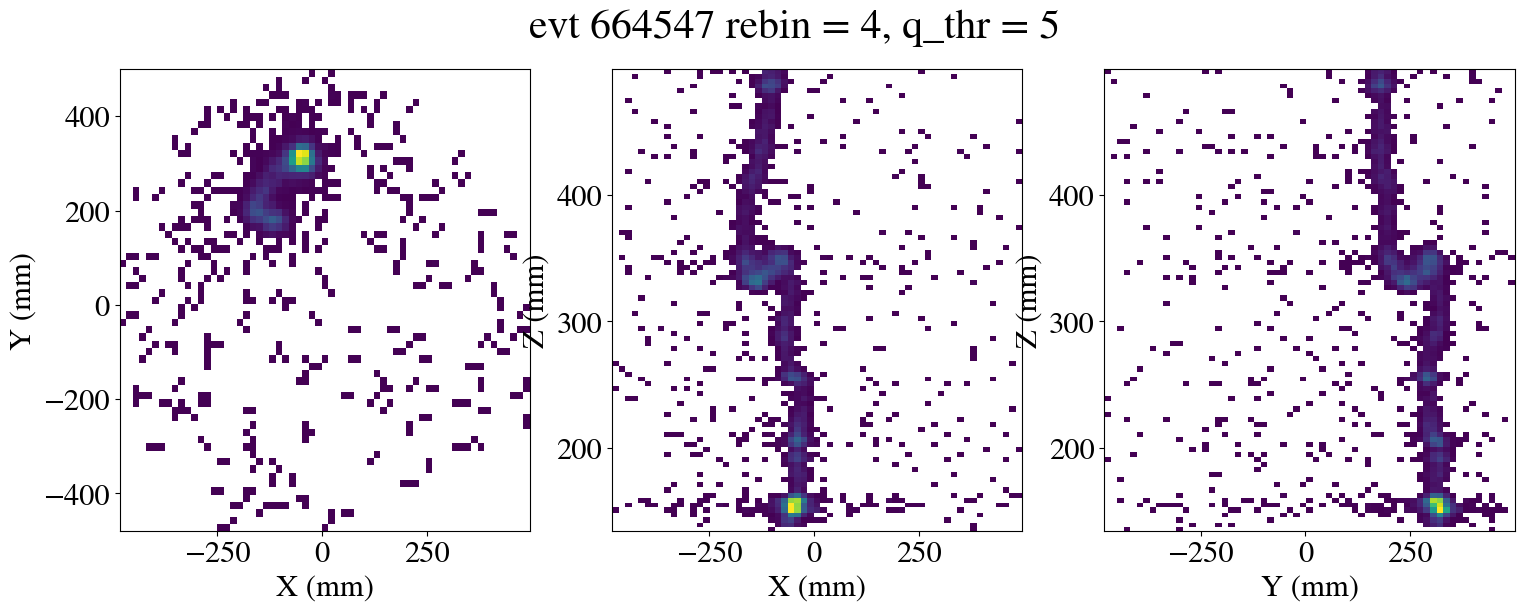

Time spent in cut_over_Q: 0.01658153533935547 s
Time spent in drop_isolated: 0.06850337982177734 s


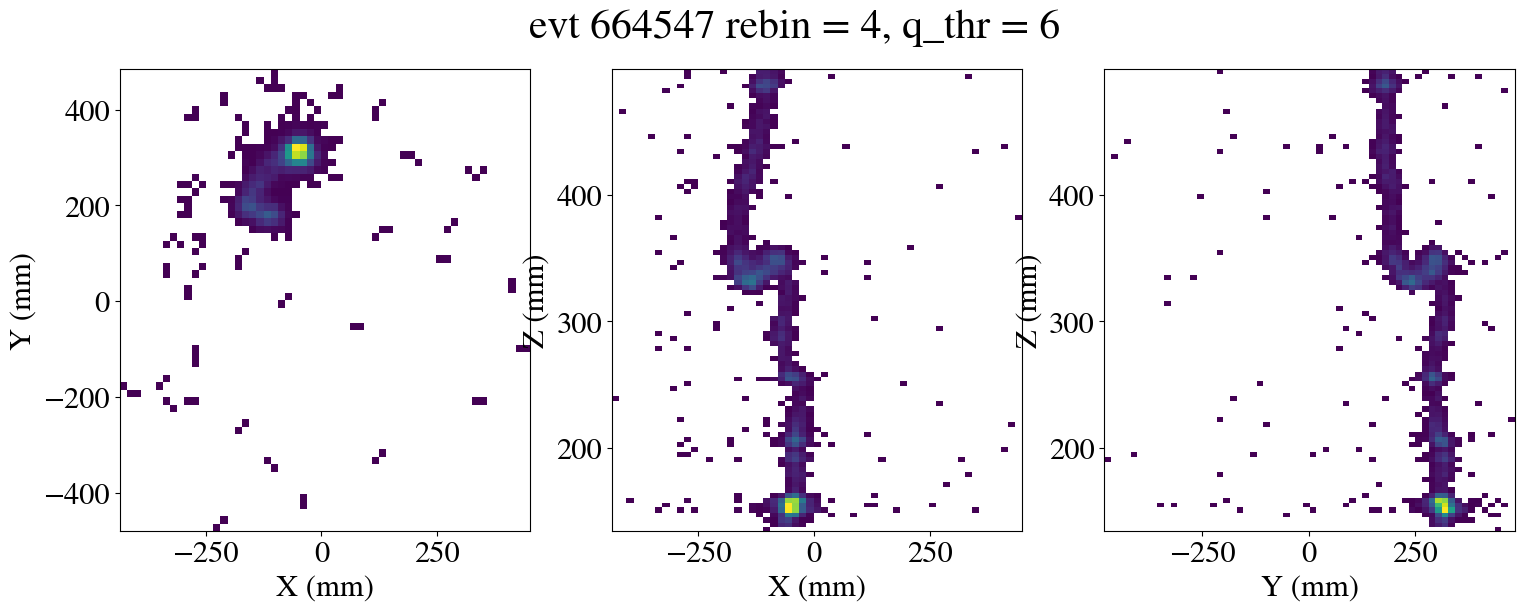

Time spent in cut_over_Q: 0.014094352722167969 s
Time spent in drop_isolated: 0.048647403717041016 s


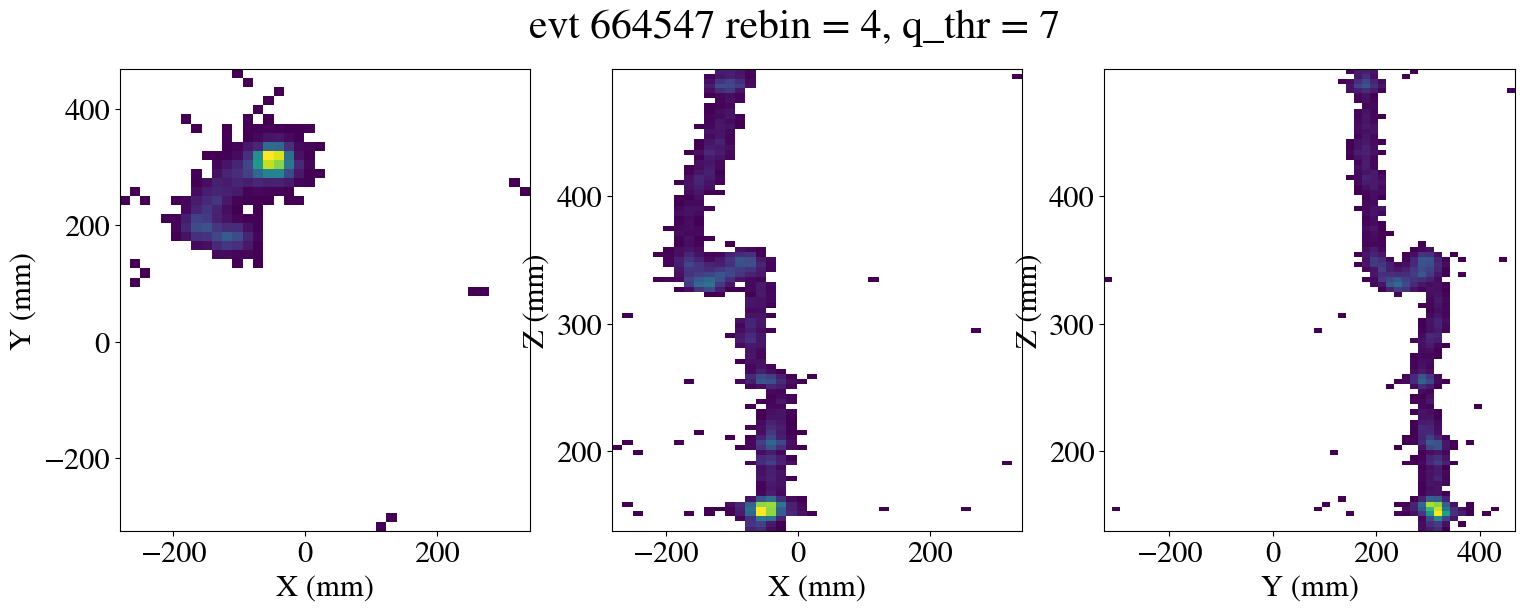

Time spent in cut_over_Q: 0.016983985900878906 s
Time spent in drop_isolated: 0.040930986404418945 s


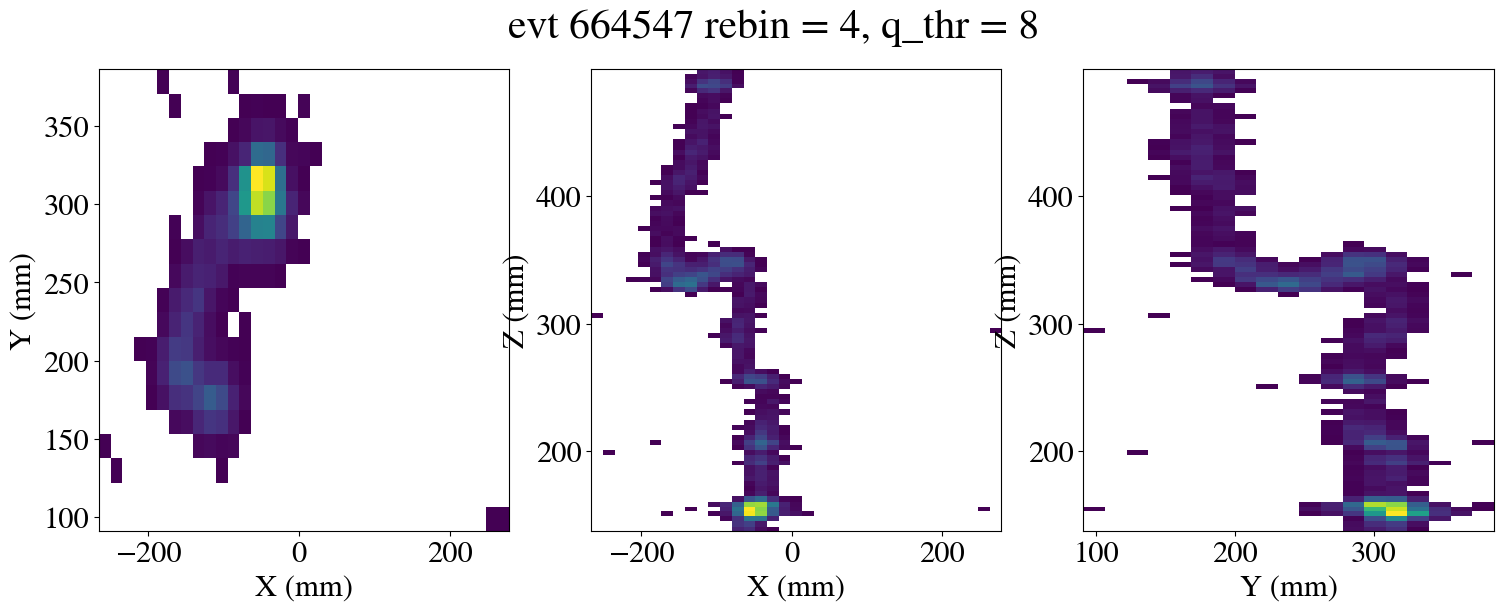

Time spent in cut_over_Q: 0.022458553314208984 s
Time spent in drop_isolated: 0.05063748359680176 s


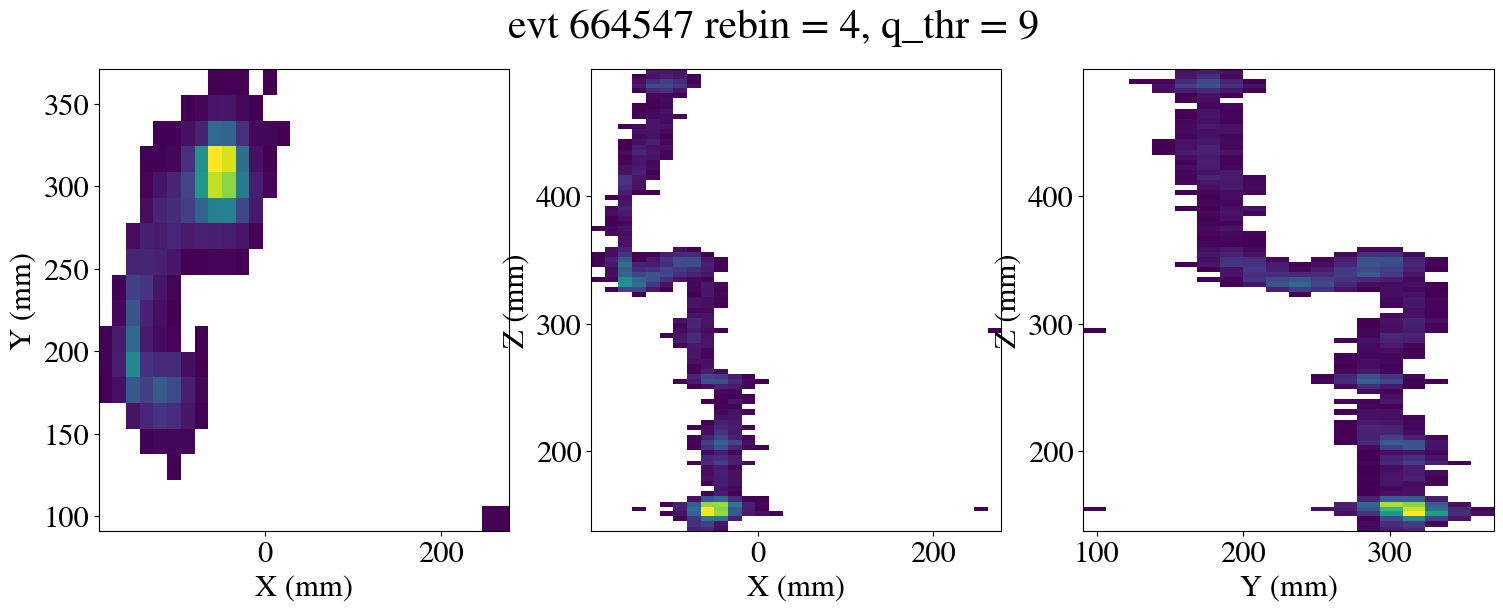

Time spent in cut_over_Q: 0.020493030548095703 s
Time spent in drop_isolated: 0.042467355728149414 s


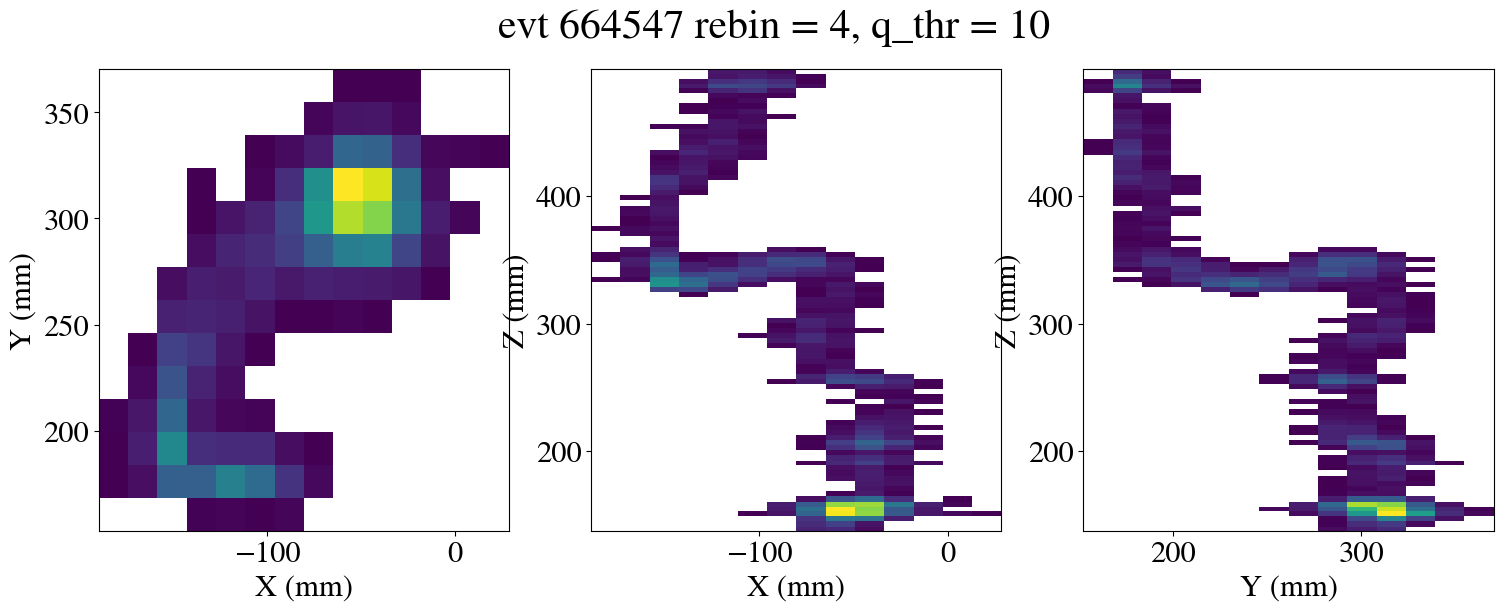

In [21]:
for i in range(5, 11):
    # enforce a new q_cut
    cut_sensors       = beerfun.cut_over_Q   (i, ['E', 'Ec'])

    evt_interest = soph_hdst[soph_hdst.event == evt]
    
    hits_cut = coref.timefunc(cut_sensors)(evt_interest.copy())
    hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy()) 


    plot_hits(hits_drop, evt, title = f'evt {evt} rebin = 4, q_thr = {i}')


In [82]:
def bespoke_cut_plot(cut_df, i, cut, axes, passthrough_limits):
    
    xx, yy, zz = passthrough_limits
    

    axes[0][i].hist2d(cut_df.X, cut_df.Y, bins=[xx, yy], weights=cut_df.Q, cmin=0.0001);
    axes[0][i].set_xlabel('X (mm)');
    axes[0][i].set_ylabel('Y (mm)');
    


    axes[1][i].hist2d(cut_df.X, cut_df.Z, bins=[xx, zz], weights=cut_df.Q, cmin=0.0001);
    axes[1][i].set_xlabel('X (mm)');
    axes[1][i].set_ylabel('Z (mm)');


    axes[2][i].hist2d(cut_df.Y, cut_df.Z, bins=[yy, zz], weights=cut_df.Q, cmin=0.0001);
    axes[2][i].set_xlabel('Y (mm)');
    axes[2][i].set_ylabel('Z (mm)');
    
    axes[0][i].set_title(f'q_cut: {cut}', fontsize=30)

    
    #axes[0][i].suptitle(f'evt {evt} rebin = 4, cut = {cut}', fontsize=30)
    #plt.savefig(f'plots/hits_{evt}.pdf')

def apply_q_cuts_iter(df, cuts):
    '''
    push through hits df, and list of cuts
    plot made corresponding to the list
    '''
    pitch = 15.55

    fig, axes = plt.subplots(3, len(cuts), figsize = (30,18))

    xx = np.arange(df.X.min(), df.X.max() + pitch, pitch)
    yy = np.arange(df.Y.min(), df.Y.max() + pitch, pitch)
    zz = df.Z.unique()

    for i, cut in enumerate(cuts):

        # apply cut
        cut_sensors       = beerfun.cut_over_Q   (cut, ['E', 'Ec'])

        hits_cut = coref.timefunc(cut_sensors)(df.copy())
        hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy()) 
        print(f'Cutting over {cut}, {i}')
        # plot
        bespoke_cut_plot(hits_drop, i, cut, axes, (xx,yy,zz))
    fig.tight_layout()
    fig.show()

Time spent in cut_over_Q: 0.023691177368164062 s
Time spent in drop_isolated: 0.1345815658569336 s
Cutting over 5, 0
Time spent in cut_over_Q: 0.015552997589111328 s
Time spent in drop_isolated: 0.06232428550720215 s
Cutting over 6, 1
Time spent in cut_over_Q: 0.01450967788696289 s
Time spent in drop_isolated: 0.04750490188598633 s
Cutting over 7, 2
Time spent in cut_over_Q: 0.01477813720703125 s
Time spent in drop_isolated: 0.03894662857055664 s
Cutting over 8, 3
Time spent in cut_over_Q: 0.014490365982055664 s
Time spent in drop_isolated: 0.03598809242248535 s
Cutting over 9, 4
Time spent in cut_over_Q: 0.015208721160888672 s
Time spent in drop_isolated: 0.030324935913085938 s
Cutting over 10, 5


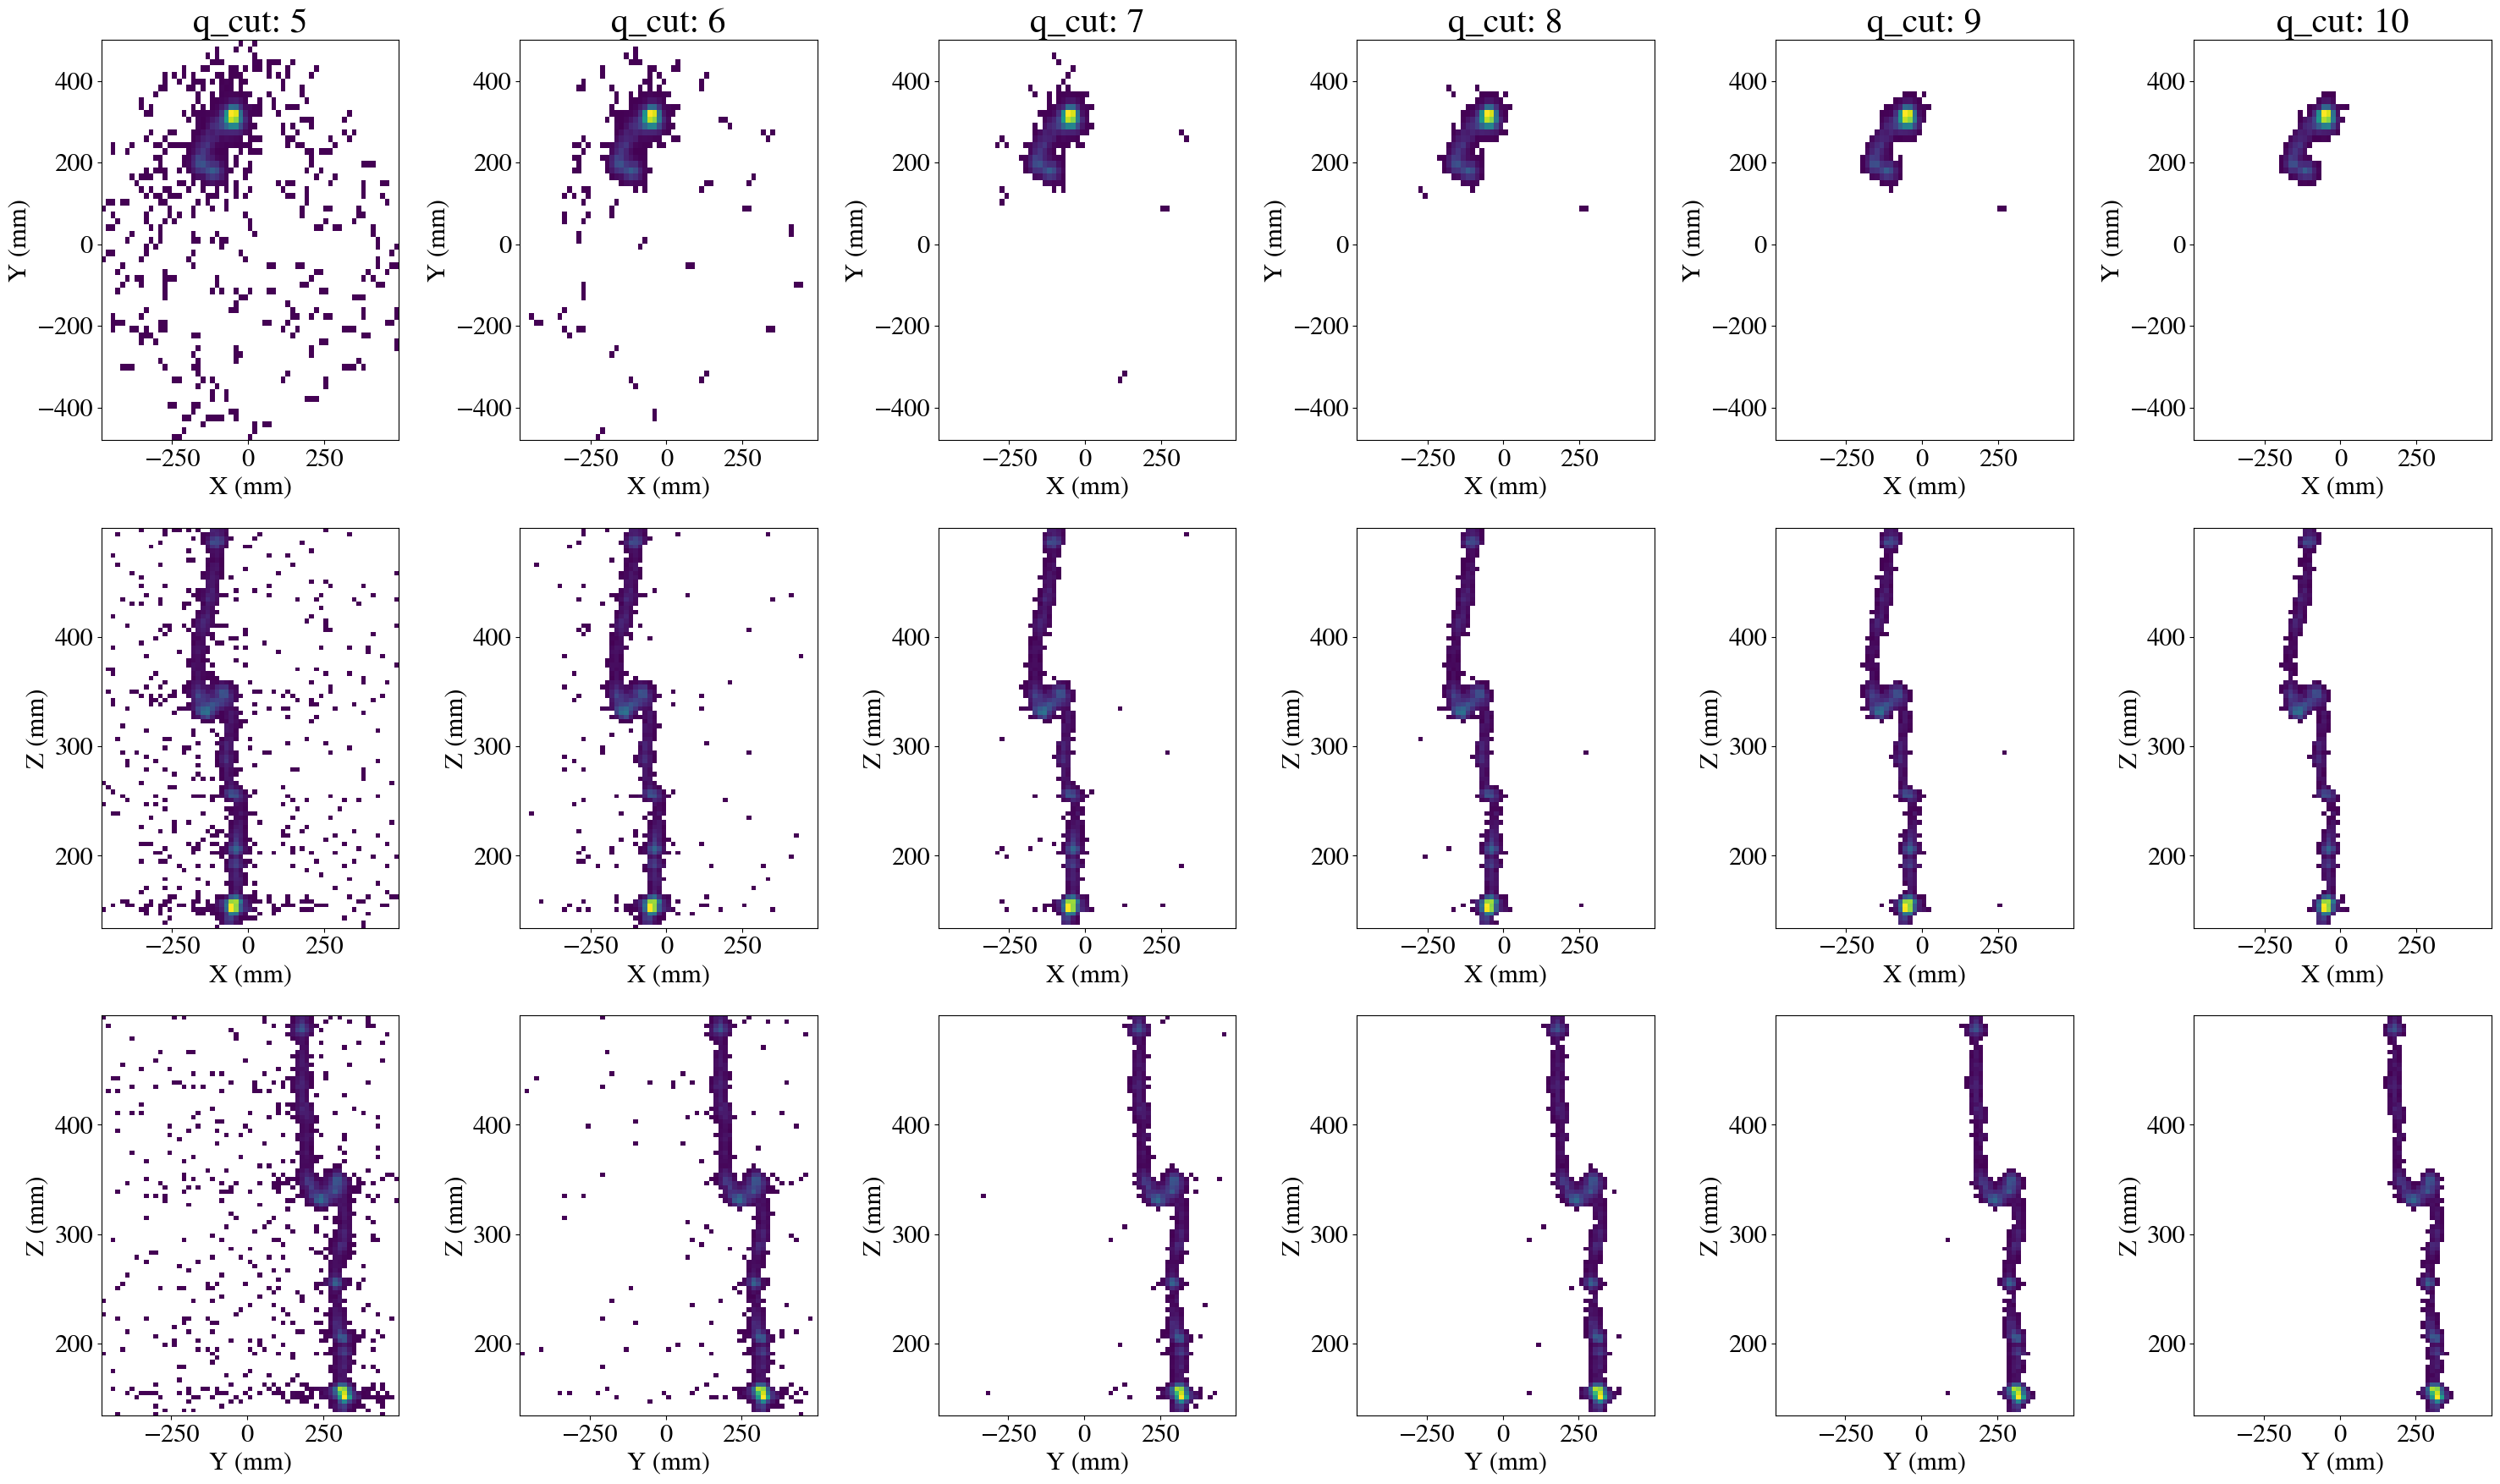

In [83]:
apply_q_cuts_iter(soph_hdst[soph_hdst.event == evt], [5,6,7,8,9,10])

# Lets select some particular events...

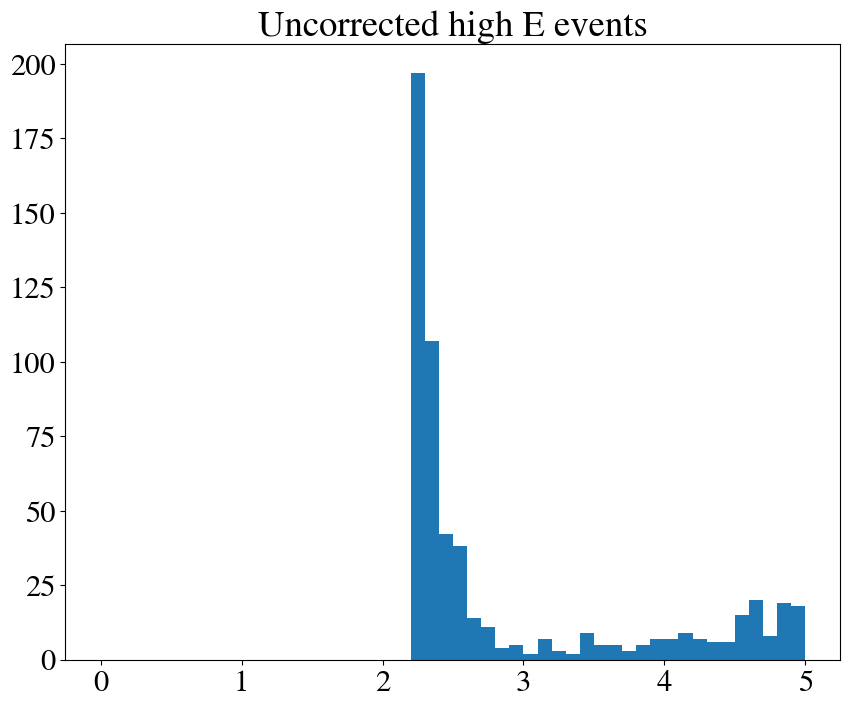

In [85]:
soph_file = '../files/15107_energy_split/corr_post_CE.h5'
post_CE = pd.read_hdf(soph_file, key = 'RECO/Events')

plt.hist(post_CE.groupby('event').Ec.sum(), bins = 50, range = [0, 5])
plt.title('Uncorrected high E events')
plt.show()

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
23029319,161072,1.742937e+09,0,-83.423721,131.098703,1,-312.575,-279.275,0.0,0.0,307.26950,6.153269,47.702641,-1.0,0.000265,-1,-1.0
23029320,161072,1.742937e+09,0,-83.423721,131.098703,1,-34.675,-464.375,0.0,0.0,307.26950,5.336210,41.368467,-1.0,NaN,-1,-1.0
23029321,161072,1.742937e+09,0,-83.423721,131.098703,1,335.525,-48.025,0.0,0.0,307.26950,5.056707,39.201648,-1.0,0.000202,-1,-1.0
23029322,161072,1.742937e+09,0,-83.423721,131.098703,1,-420.425,260.975,0.0,0.0,310.79550,5.212162,102.658960,-1.0,NaN,-1,-1.0
23029323,161072,1.742937e+09,0,-83.423721,131.098703,1,-328.125,153.125,0.0,0.0,310.79550,7.291591,143.615483,-1.0,0.000754,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23032758,161072,1.742937e+09,0,-83.423721,131.098703,1,181.025,-155.375,0.0,0.0,677.60600,8.037852,54.941241,-1.0,0.000266,-1,-1.0
23032759,161072,1.742937e+09,0,-83.423721,131.098703,1,227.675,-170.925,0.0,0.0,677.60600,6.469035,44.217881,-1.0,0.000219,-1,-1.0
23032760,161072,1.742937e+09,0,-83.423721,131.098703,1,-281.475,75.375,0.0,0.0,680.91525,5.999559,11.985392,-1.0,0.000061,-1,-1.0
23032761,161072,1.742937e+09,0,-83.423721,131.098703,1,-81.325,-233.125,0.0,0.0,680.91525,6.027128,12.040466,-1.0,0.000061,-1,-1.0


EVENT 161072
Total energy 2.30 MeV



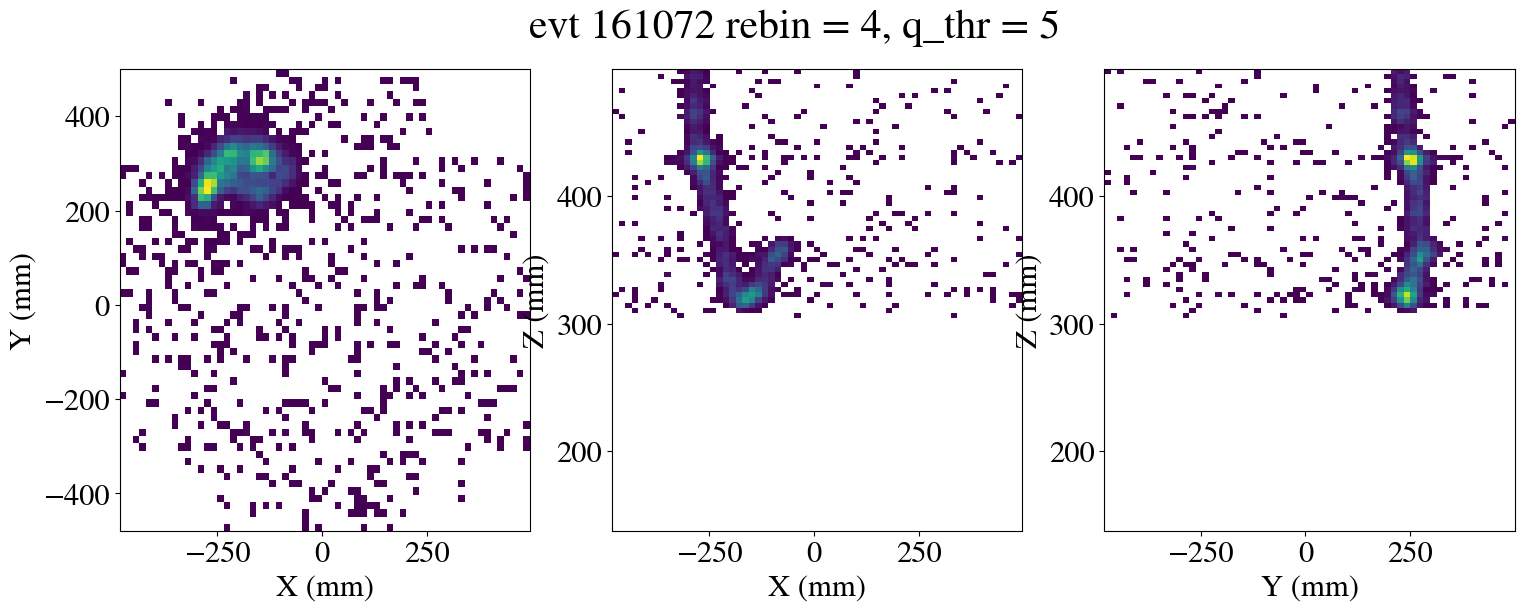

In [110]:
evt = post_CE.event.unique()[70]

evt_interest = post_CE[post_CE.event == evt]
display(evt_interest)
q = 5
plot_hits(evt_interest, evt, title = f'evt {evt} rebin = 4, q_thr = {q}')


Time spent in cut_over_Q: 0.014391183853149414 s
Time spent in drop_isolated: 0.1645200252532959 s
Cutting over 5, 0
Time spent in cut_over_Q: 0.013133764266967773 s
Time spent in drop_isolated: 0.11038970947265625 s
Cutting over 6, 1
Time spent in cut_over_Q: 0.012828826904296875 s
Time spent in drop_isolated: 0.0832357406616211 s
Cutting over 7, 2
Time spent in cut_over_Q: 0.01303863525390625 s
Time spent in drop_isolated: 0.06428933143615723 s
Cutting over 8, 3
Time spent in cut_over_Q: 0.012789011001586914 s
Time spent in drop_isolated: 0.053376197814941406 s
Cutting over 9, 4
Time spent in cut_over_Q: 0.012943267822265625 s
Time spent in drop_isolated: 0.04837298393249512 s
Cutting over 10, 5


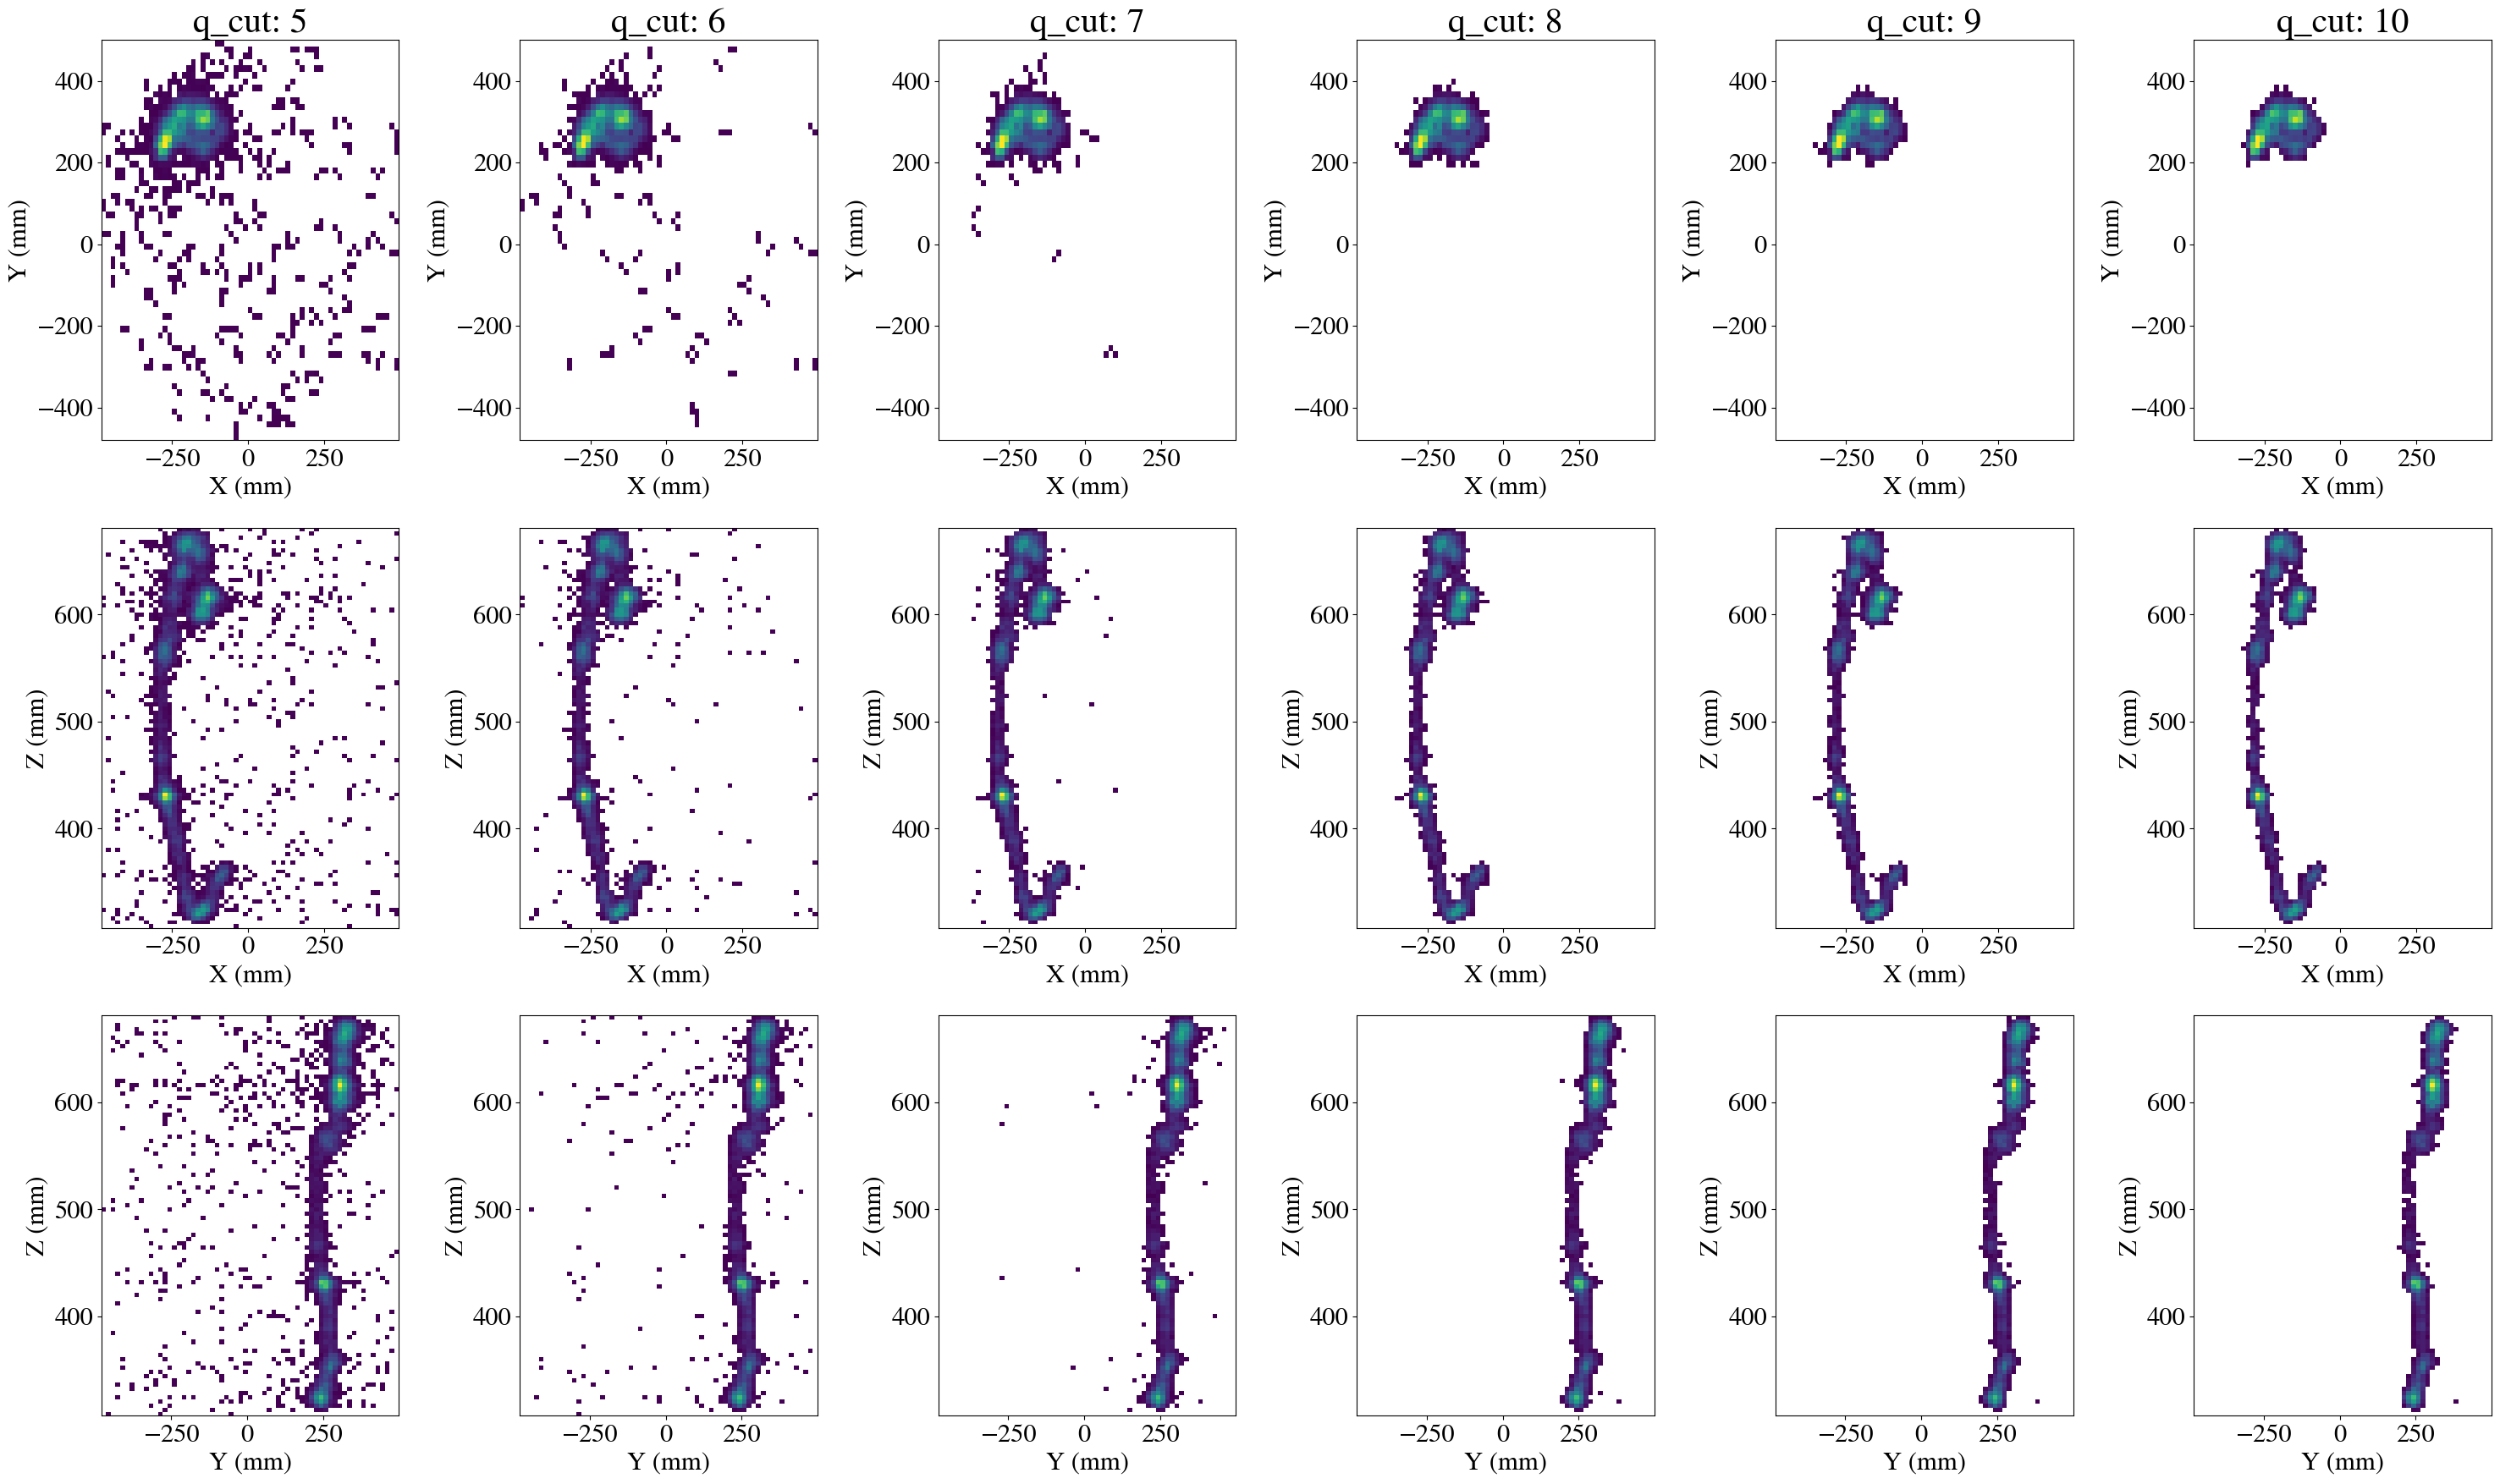

In [111]:
apply_q_cuts_iter(evt_interest, [5,6,7,8,9,10])

# DEP

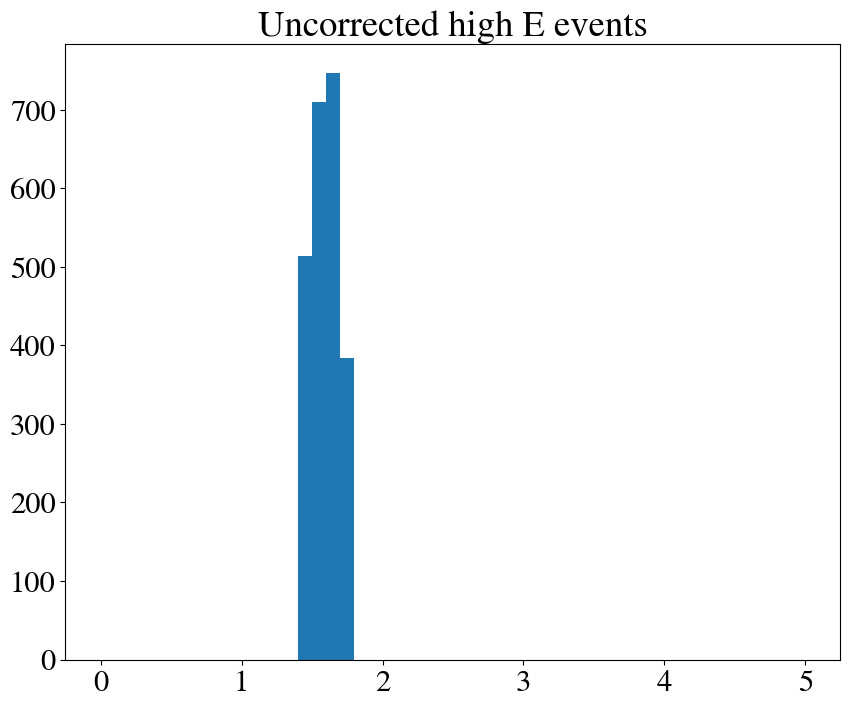

In [113]:
soph_file = '../files/15107_energy_split/corr_DES.h5'
post_DES = pd.read_hdf(soph_file, key = 'RECO/Events')

plt.hist(post_DES.groupby('event').Ec.sum(), bins = 50, range = [0, 5])
plt.title('Uncorrected high E events')
plt.show()

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
119137,904297,1.742947e+09,0,159.186733,-89.556379,1,-389.325,14.175,0.0,0.0,232.150500,5.435636,93.589555,-1.0,0.000501,-1,-1.0
119138,904297,1.742947e+09,0,159.186733,-89.556379,1,-343.675,122.025,0.0,0.0,232.150500,5.928951,102.083354,-1.0,0.000534,-1,-1.0
119139,904297,1.742947e+09,0,159.186733,-89.556379,1,-173.625,-325.425,0.0,0.0,232.150500,5.031728,86.635161,-1.0,0.000458,-1,-1.0
119140,904297,1.742947e+09,0,159.186733,-89.556379,1,474.475,90.925,0.0,0.0,232.150500,8.439252,145.305148,-1.0,NaN,-1,-1.0
119141,904297,1.742947e+09,0,159.186733,-89.556379,1,-451.525,45.275,0.0,0.0,235.539250,5.315217,74.506547,-1.0,0.000466,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121119,904297,1.742947e+09,0,159.186733,-89.556379,1,427.825,137.575,0.0,0.0,366.290500,5.104675,23.994238,-1.0,0.000149,-1,-1.0
121120,904297,1.742947e+09,0,159.186733,-89.556379,1,-343.675,106.475,0.0,0.0,369.961125,6.347174,6.574105,-1.0,0.000034,-1,-1.0
121121,904297,1.742947e+09,0,159.186733,-89.556379,1,181.025,-186.475,0.0,0.0,369.961125,5.679842,5.882914,-1.0,0.000029,-1,-1.0
121122,904297,1.742947e+09,0,159.186733,-89.556379,1,149.925,214.825,0.0,0.0,369.961125,5.938588,6.150911,-1.0,0.000031,-1,-1.0


EVENT 904297
Total energy 1.71 MeV



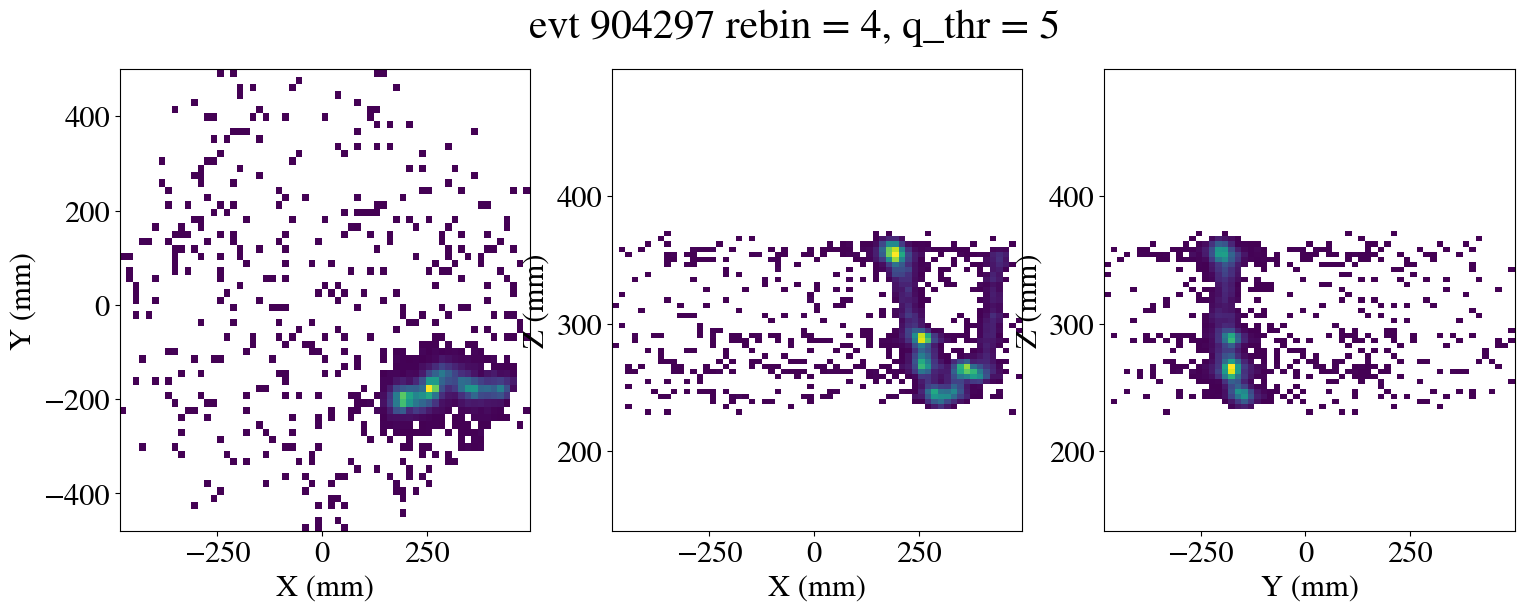

In [116]:
evt = post_DES.event.unique()[2]

evt_interest = post_DES[post_DES.event == evt]
display(evt_interest)
q = 5
plot_hits(evt_interest, evt, title = f'evt {evt} rebin = 4, q_thr = {q}')

Time spent in cut_over_Q: 0.02280902862548828 s
Time spent in drop_isolated: 0.1025078296661377 s
Cutting over 5, 0
Time spent in cut_over_Q: 0.01904582977294922 s
Time spent in drop_isolated: 0.07140445709228516 s
Cutting over 6, 1
Time spent in cut_over_Q: 0.01825690269470215 s
Time spent in drop_isolated: 0.05527758598327637 s
Cutting over 7, 2
Time spent in cut_over_Q: 0.018380403518676758 s
Time spent in drop_isolated: 0.04962658882141113 s
Cutting over 8, 3
Time spent in cut_over_Q: 0.013619422912597656 s
Time spent in drop_isolated: 0.031792640686035156 s
Cutting over 9, 4
Time spent in cut_over_Q: 0.012988805770874023 s
Time spent in drop_isolated: 0.028412580490112305 s
Cutting over 10, 5


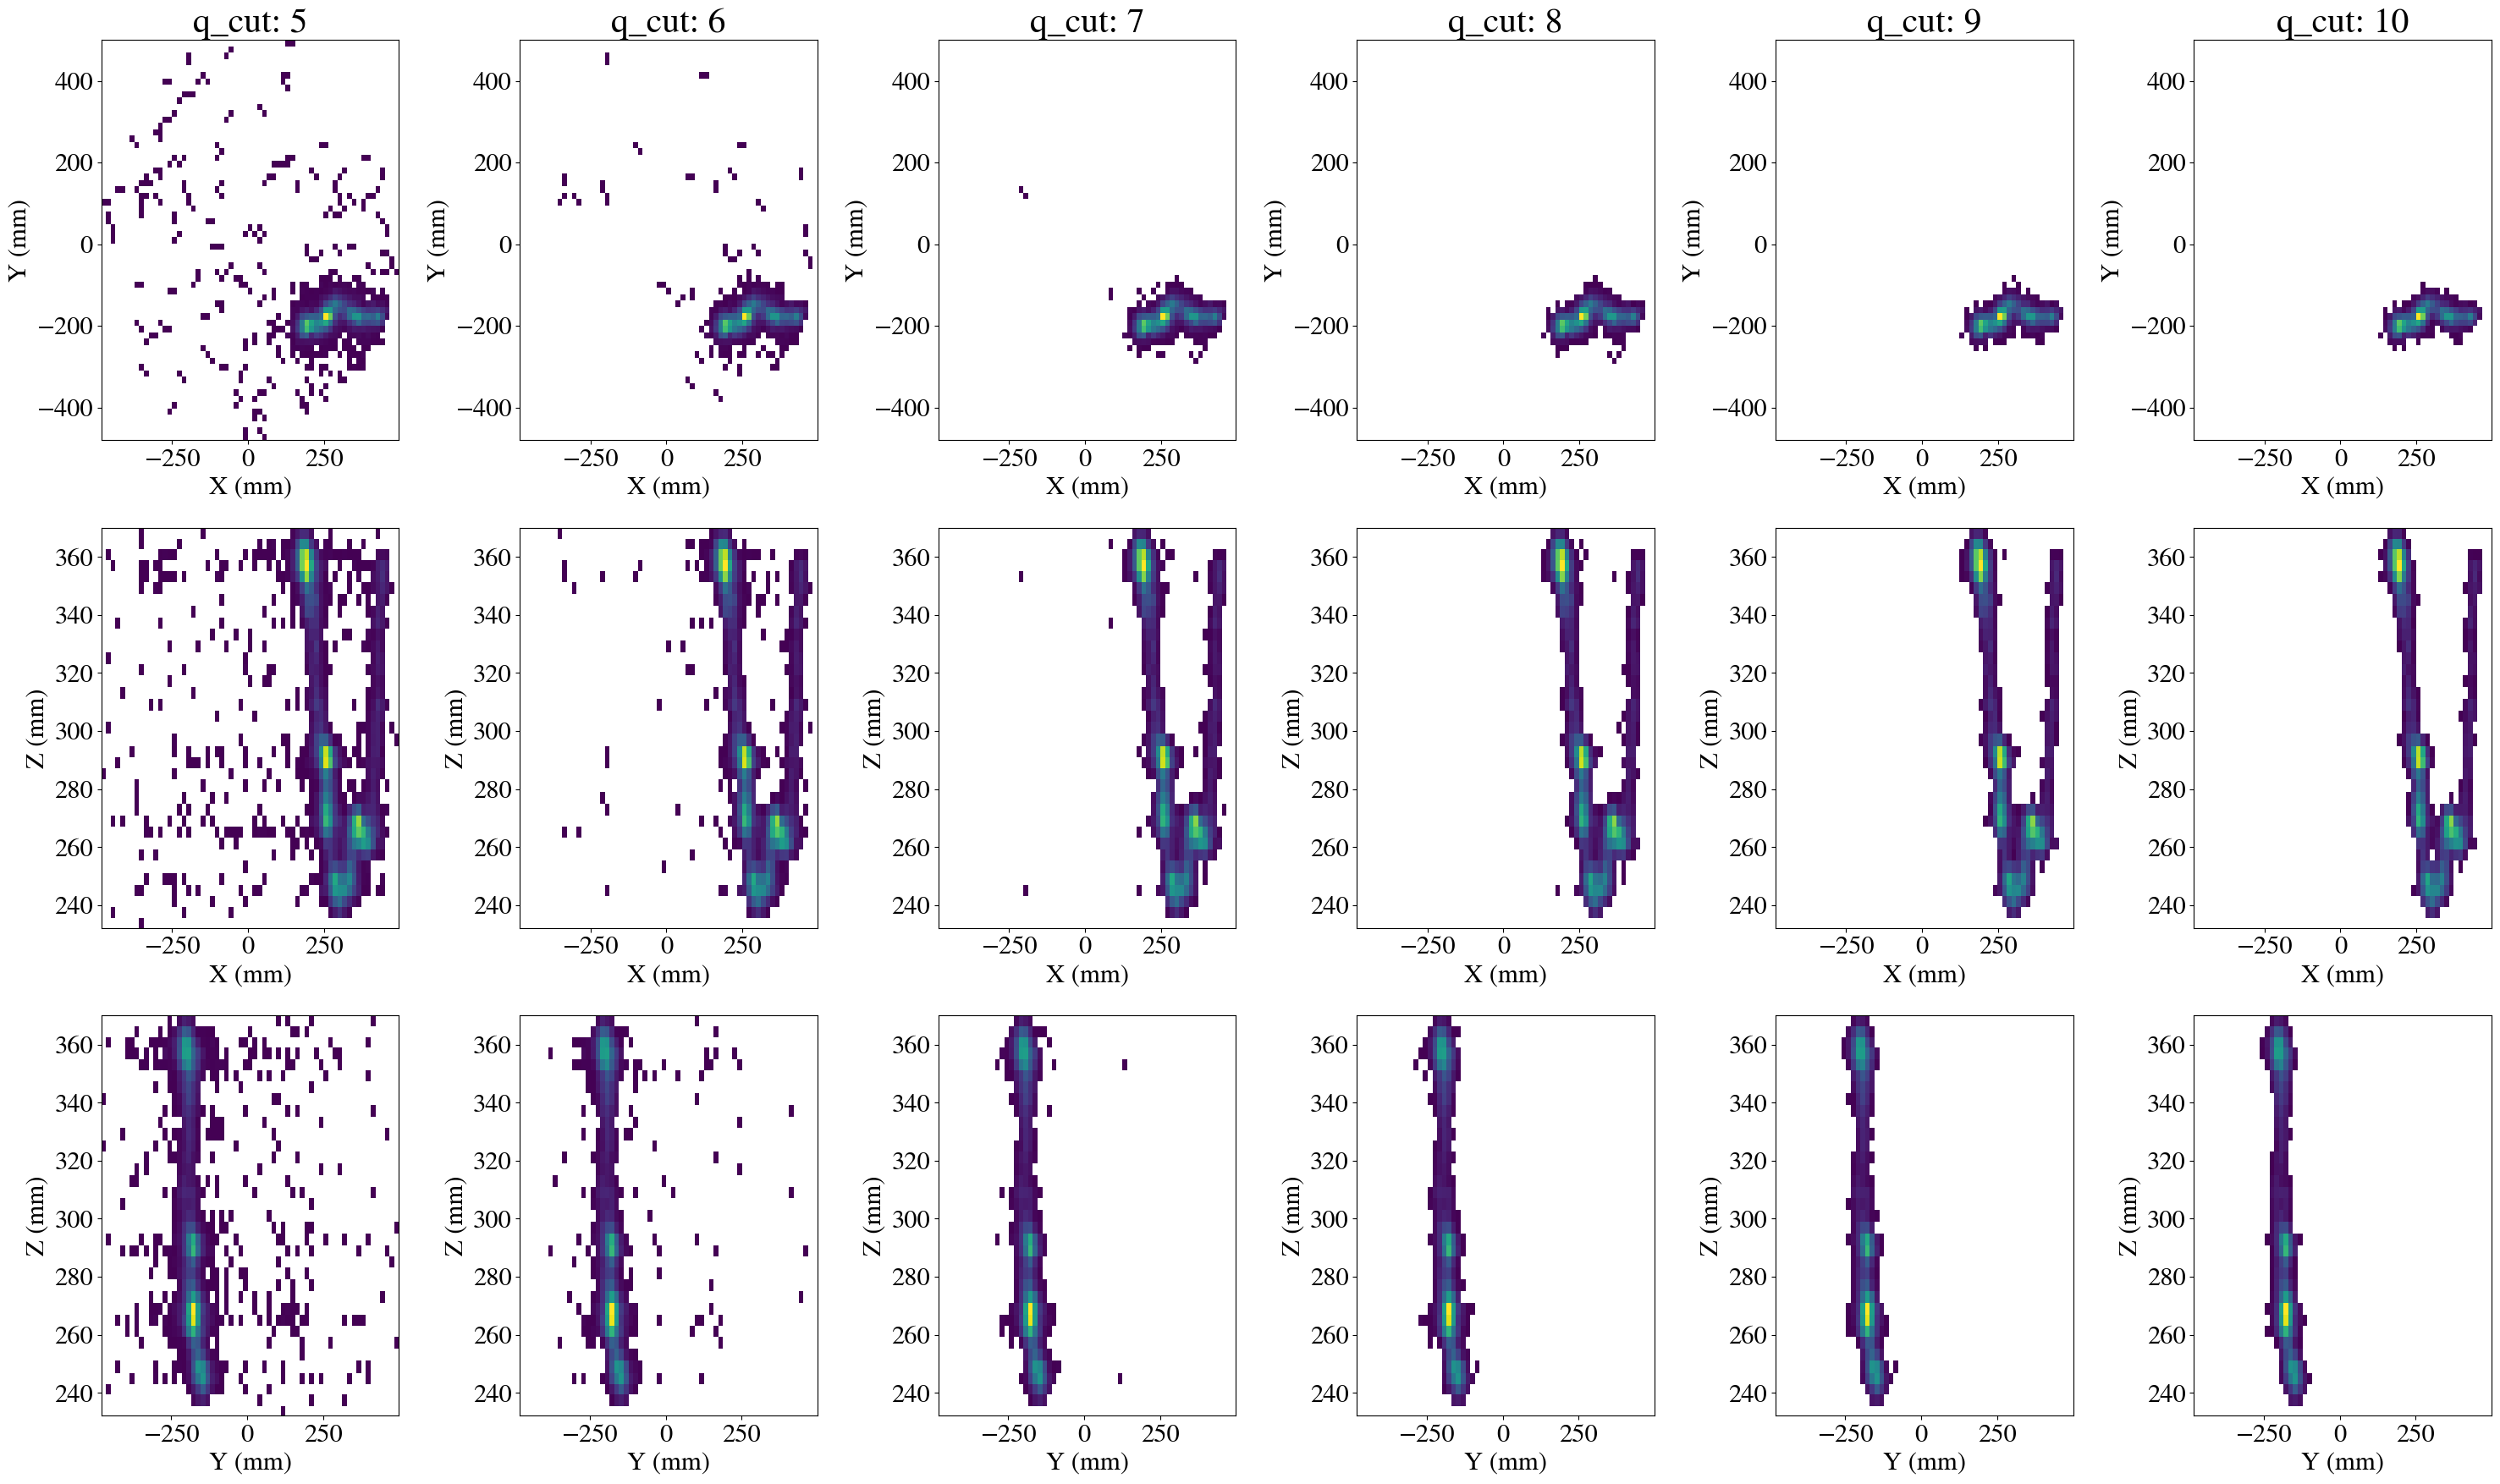

In [117]:
apply_q_cuts_iter(evt_interest, [5,6,7,8,9,10])